In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [747]:
data_file = "conso.txt"

In [748]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

read_text(data_file)

['Conso\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.19\n', '0.17\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.14\n', '0.18\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.22\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.21\n', '0.2\n', '0.2\n', '0.2\n', '0.2\n', '0.2\n', '0.25\n', '0.25\n', '0.

In [749]:
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [750]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [751]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


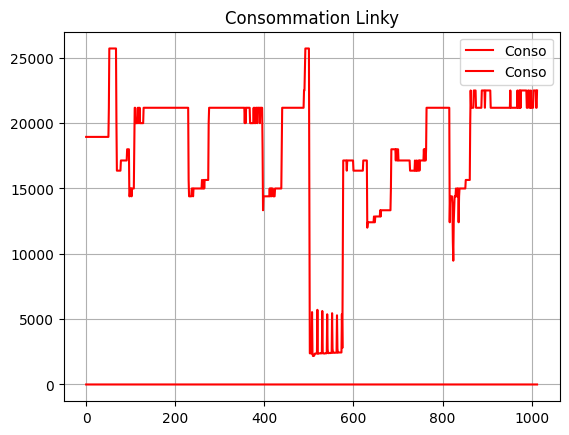

In [752]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [753]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [754]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  2568 non-null   int64  
 1   kWh       2568 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.2 KB


In [755]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
2563,24844,0.14
2564,24504,0.15
2565,24779,0.14
2566,24763,0.14


In [756]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
2563,24844,0.14,24.844,144.904202,67100328
2564,24504,0.15,24.504,146.914789,67124832
2565,24779,0.14,24.779,145.284313,67149611
2566,24763,0.14,24.763,145.378185,67174374


In [757]:
# index dernier echantillon
l=len(conso_data)-1
l

2567

In [758]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

67198594000

In [759]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data#.info()


,Interval,kWh,sec,Wh,cumul(ms),dates
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:19:02.086490
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:19:28.329490
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:19:54.214490
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:20:19.968490
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:20:45.742490
...,...,...,...,...,...,...
2563,24844,0.14,24.844,144.904202,67100328,2024-03-07 18:56:56.125490
2564,24504,0.15,24.504,146.914789,67124832,2024-03-07 18:57:20.629490
2565,24779,0.14,24.779,145.284313,67149611,2024-03-07 18:57:45.408490
2566,24763,0.14,24.763,145.378185,67174374,2024-03-07 18:58:10.171490


In [760]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:19:02.086490,
       Interval   kWh    sec         Wh  cumul(ms)                      dates
 2567     24220  0.15  24.22  148.63749   67198594 2024-03-07 18:58:34.391490)

In [761]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0      2024-03-07 00:19:02.086490
1      2024-03-07 00:19:28.329490
2      2024-03-07 00:19:54.214490
3      2024-03-07 00:20:19.968490
4      2024-03-07 00:20:45.742490
                  ...            
2563   2024-03-07 18:56:56.125490
2564   2024-03-07 18:57:20.629490
2565   2024-03-07 18:57:45.408490
2566   2024-03-07 18:58:10.171490
2567   2024-03-07 18:58:34.391490
Name: dates, Length: 2568, dtype: datetime64[ns]

In [762]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [763]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [764]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

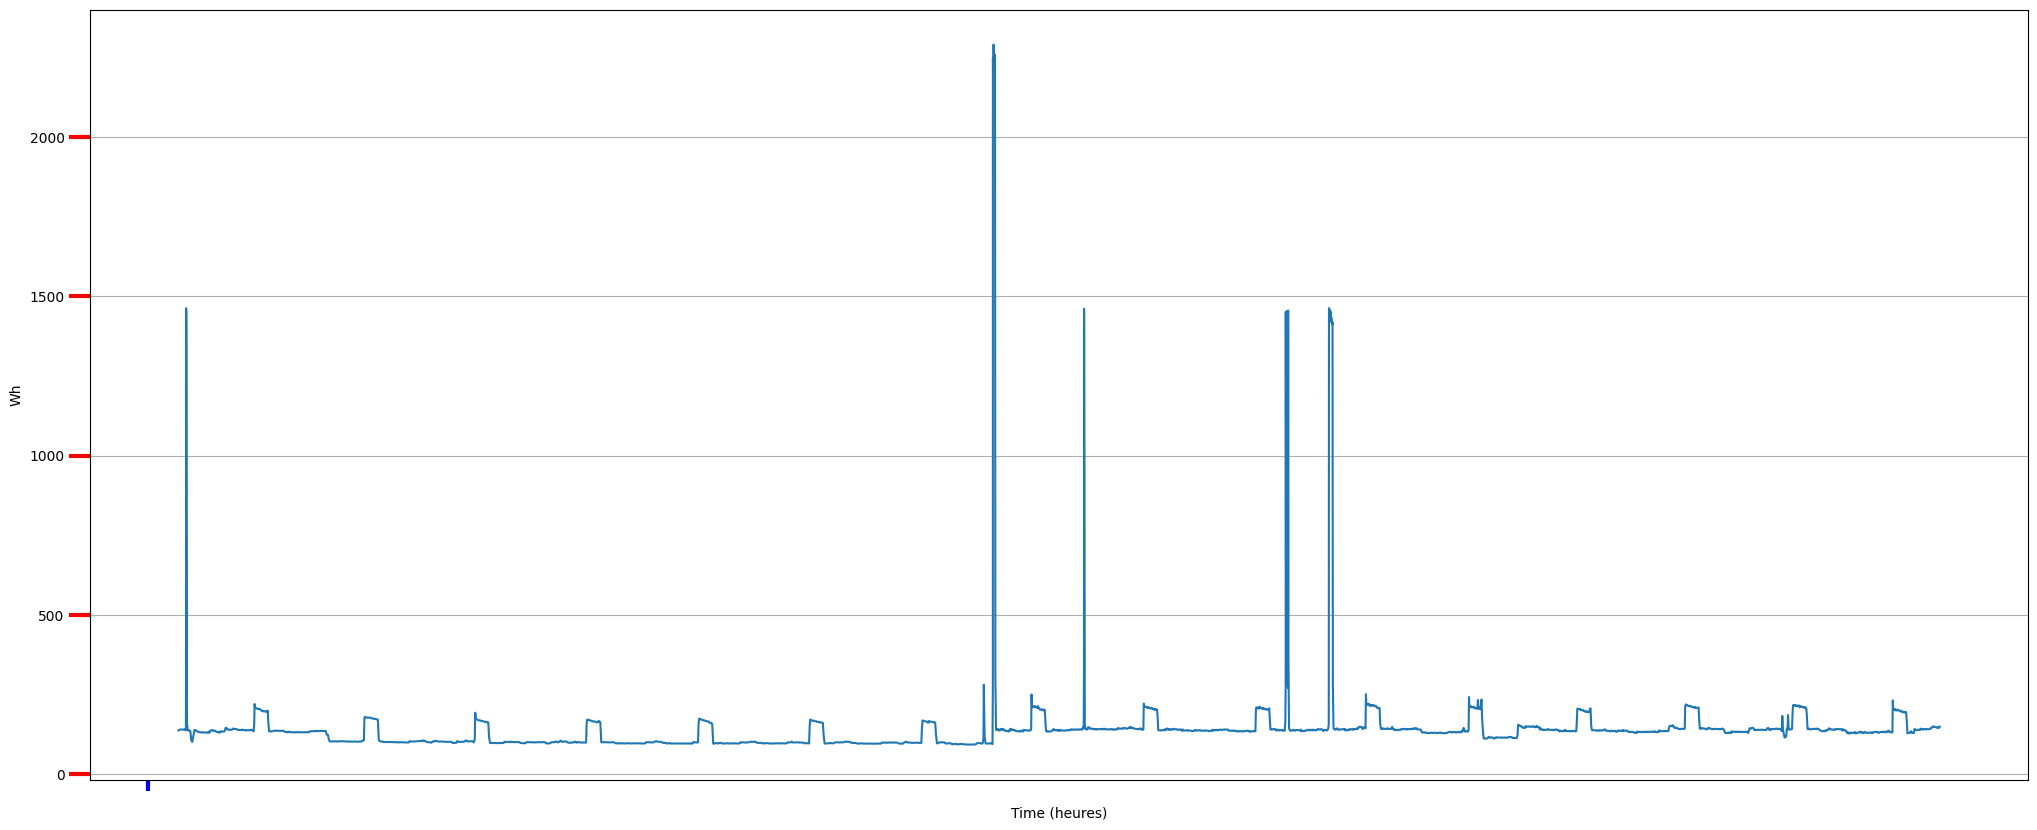

In [765]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [766]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates
2567,24220,0.15,24.22,148.63749,67198594,2024-03-07 18:58:34.391490


In [767]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

67198594000

# Slice of last 1 kWh

In [768]:
l = len(conso_data)  # total watt consommés
l

2568

In [769]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(2568, 1000)

In [770]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [771]:
data = conso_data.tail(taille)
len(data),data

(1000,
       Interval   kWh     sec           Wh  cumul(ms)  \
 1568     26371  0.14  26.371   136.513594   43820760   
 1569     26038  0.14  26.038   138.259467   43846798   
 1570     25350  0.14  25.350   142.011834   43872148   
 1571     23186  0.16  23.186   155.266109   43895334   
 1572      3492  1.03   3.492  1030.927835   43898826   
 ...        ...   ...     ...          ...        ...   
 2563     24844  0.14  24.844   144.904202   67100328   
 2564     24504  0.15  24.504   146.914789   67124832   
 2565     24779  0.14  24.779   145.284313   67149611   
 2566     24763  0.14  24.763   145.378185   67174374   
 2567     24220  0.15  24.220   148.637490   67198594   
 
                           dates  
 1568 2024-03-07 12:28:56.557490  
 1569 2024-03-07 12:29:22.595490  
 1570 2024-03-07 12:29:47.945490  
 1571 2024-03-07 12:30:11.131490  
 1572 2024-03-07 12:30:14.623490  
 ...                         ...  
 2563 2024-03-07 18:56:56.125490  
 2564 2024-03-07 18:57:20.6

In [772]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [773]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [774]:
cumtime_end,cumtime_start

(67198594000, 43846798000)

In [775]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23351796000

In [776]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 7, 18, 58, 35, 446277),
 datetime.datetime(2024, 3, 7, 12, 29, 23, 650277),
 '07/03/2024 18:58:34')

In [777]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('07/03/2024 12:29:22', '07/03/2024 18:58:34')

In [778]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-07 12:28:56.557490', '2024-03-07 18:58:34.391490')

In [779]:
k

1

In [780]:
data.Interval.tail(1000)

1568    26371
1569    26038
1570    25350
1571    23186
1572     3492
        ...  
2563    24844
2564    24504
2565    24779
2566    24763
2567    24220
Name: Interval, Length: 1000, dtype: int64

In [781]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.501168055555556, 3.6916443006716095, 6, 30, 4)

In [782]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates
1568,26371,0.14,26.371,136.513594,43820760,2024-03-07 12:28:56.557490
1569,26038,0.14,26.038,138.259467,43846798,2024-03-07 12:29:22.595490
1570,25350,0.14,25.350,142.011834,43872148,2024-03-07 12:29:47.945490
1571,23186,0.16,23.186,155.266109,43895334,2024-03-07 12:30:11.131490
1572,3492,1.03,3.492,1030.927835,43898826,2024-03-07 12:30:14.623490
...,...,...,...,...,...,...
2563,24844,0.14,24.844,144.904202,67100328,2024-03-07 18:56:56.125490
2564,24504,0.15,24.504,146.914789,67124832,2024-03-07 18:57:20.629490
2565,24779,0.14,24.779,145.284313,67149611,2024-03-07 18:57:45.408490
2566,24763,0.14,24.763,145.378185,67174374,2024-03-07 18:58:10.171490


<AxesSubplot: >

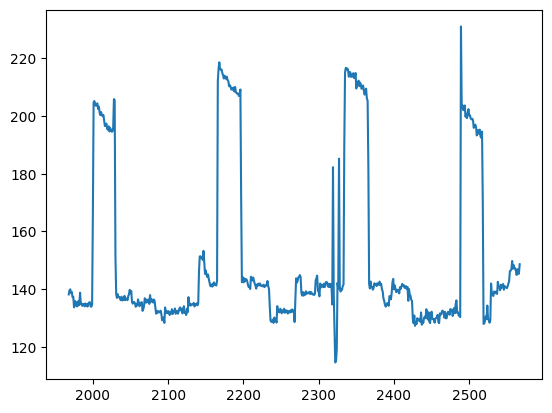

In [783]:
data.tail(600)['Wh'].plot()

In [784]:
data['Wh']

1568     136.513594
1569     138.259467
1570     142.011834
1571     155.266109
1572    1030.927835
           ...     
2563     144.904202
2564     146.914789
2565     145.284313
2566     145.378185
2567     148.637490
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

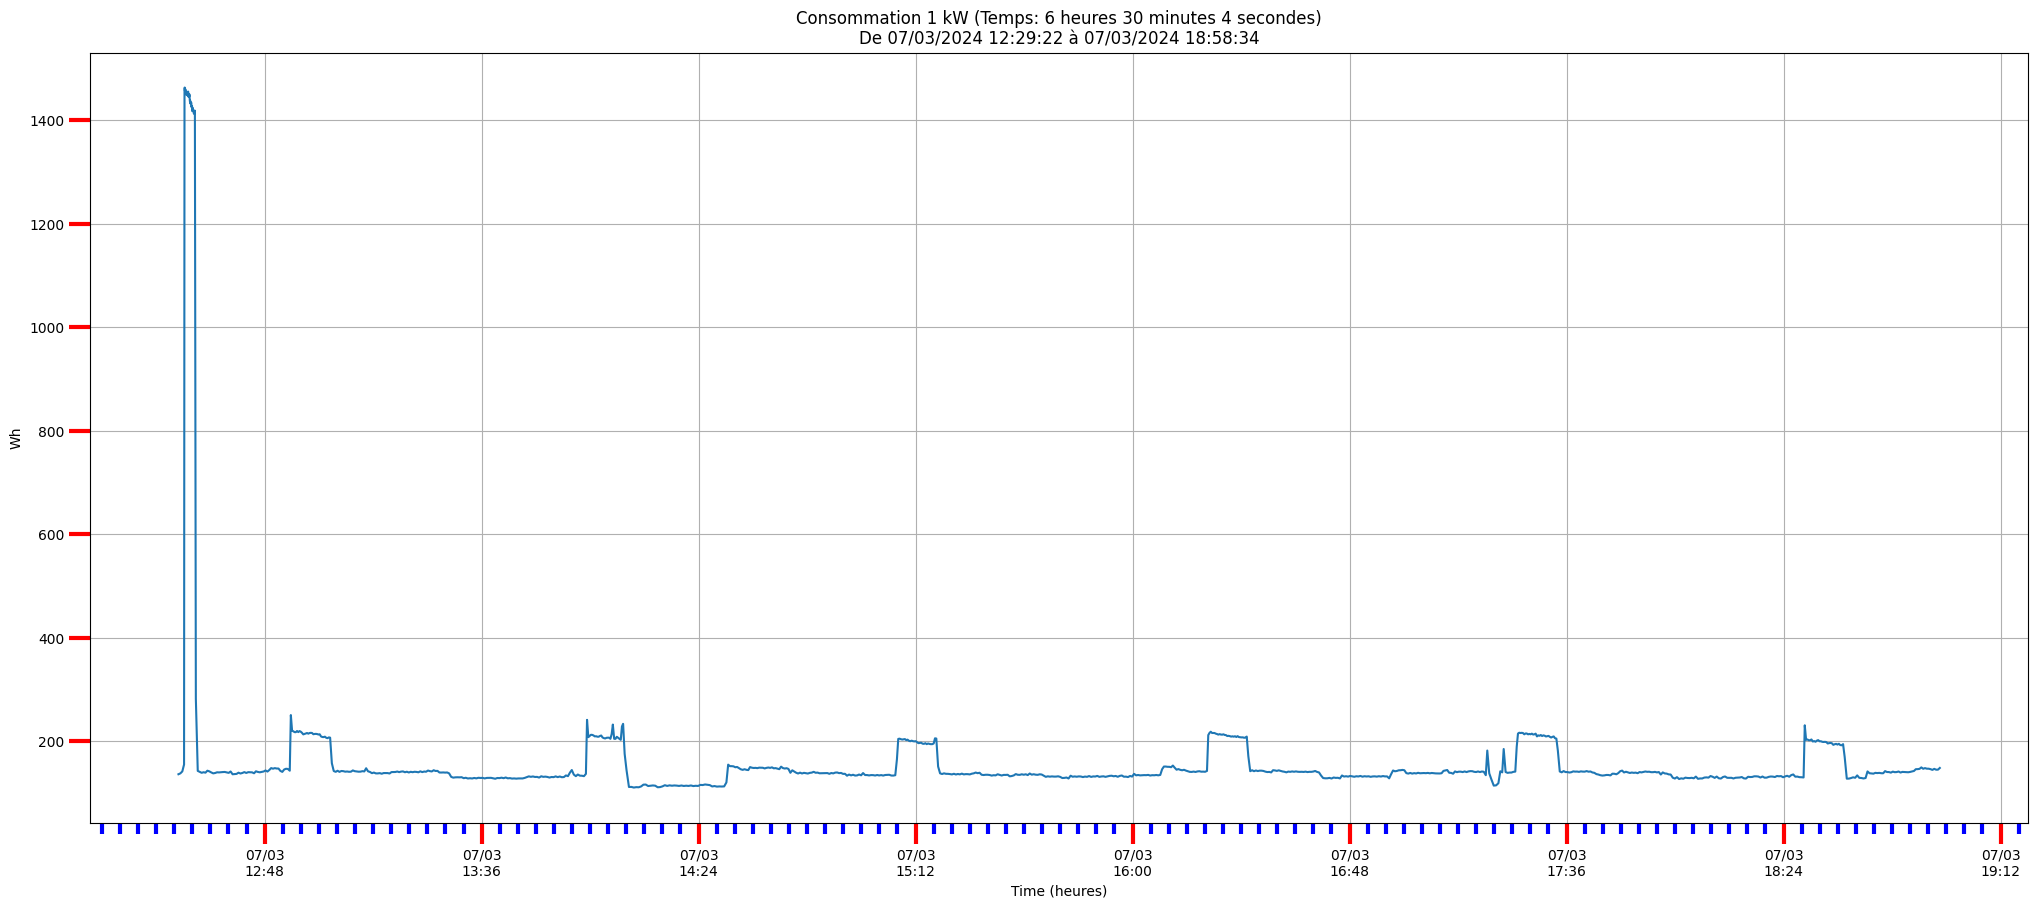

In [785]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<AxesSubplot: ylabel='Frequency'>

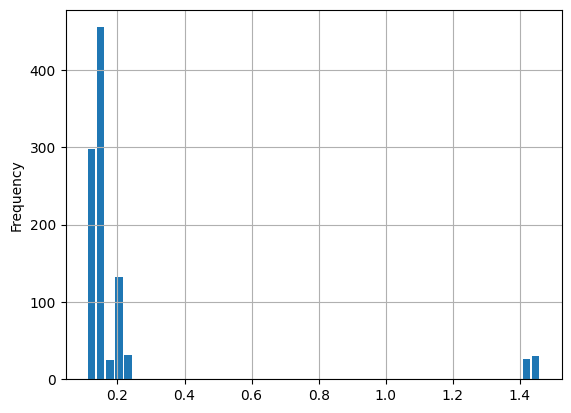

In [786]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [787]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates
2563,24844,0.14,24.844,144.904202,67100328,2024-03-07 18:56:56.125490
2564,24504,0.15,24.504,146.914789,67124832,2024-03-07 18:57:20.629490
2565,24779,0.14,24.779,145.284313,67149611,2024-03-07 18:57:45.408490
2566,24763,0.14,24.763,145.378185,67174374,2024-03-07 18:58:10.171490
2567,24220,0.15,24.220,148.637490,67198594,2024-03-07 18:58:34.391490


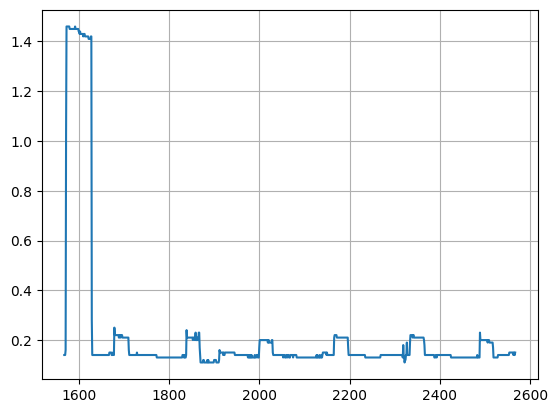

In [788]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [789]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(67198594000.0, 1119.9765666666667)

In [790]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 7, 18, 58, 39, 163878),
 datetime.datetime(2024, 3, 7, 0, 18, 40, 569878))

In [791]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(2568, 67199, 18.66638888888889)

In [792]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [793]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [794]:
732/12 # 60 jours

61.0

In [795]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

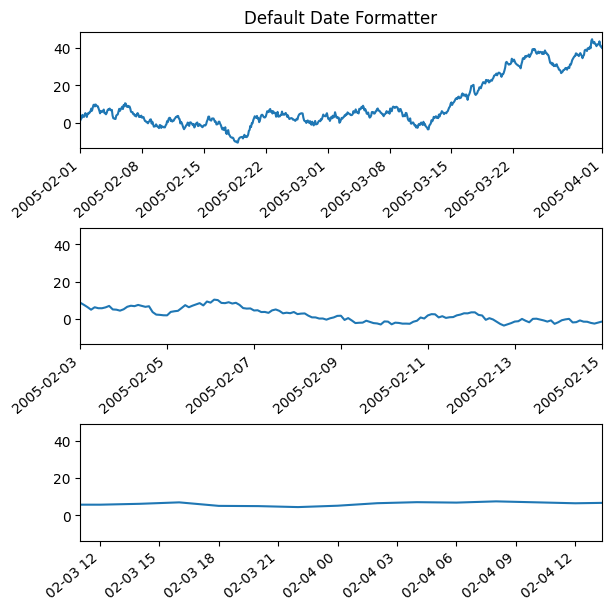

In [796]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [797]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)